# Install YOLOv10.



In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Download dataset from Google Drive.
Dataset is saved in YOLO format.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp ./drive/MyDrive/digit_in_the_back.zip .

In [ ]:
!unzip -q ./digit_in_the_back.zip

# Download model weights.

In [ ]:
!mkdir -p /content/weights

In [ ]:
!wget -P /content/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt

# Start training.
File data.yaml for training process config looks like this:
```
train: /content/digit_in_the_back/train/images
val: /content/digit_in_the_back/val/images
test: /content/digit_in_the_back/test/images
names:
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7
  8: 8
  9: 9
nc: 10
```

In [ ]:
!yolo task=detect mode=train data=digit_in_the_back/data.yaml model=weights/yolov10m.pt epochs=50 batch=16 imgsz=640 plots=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

In [ ]:
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive

# Training results.

In [ ]:
import random
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLOv10

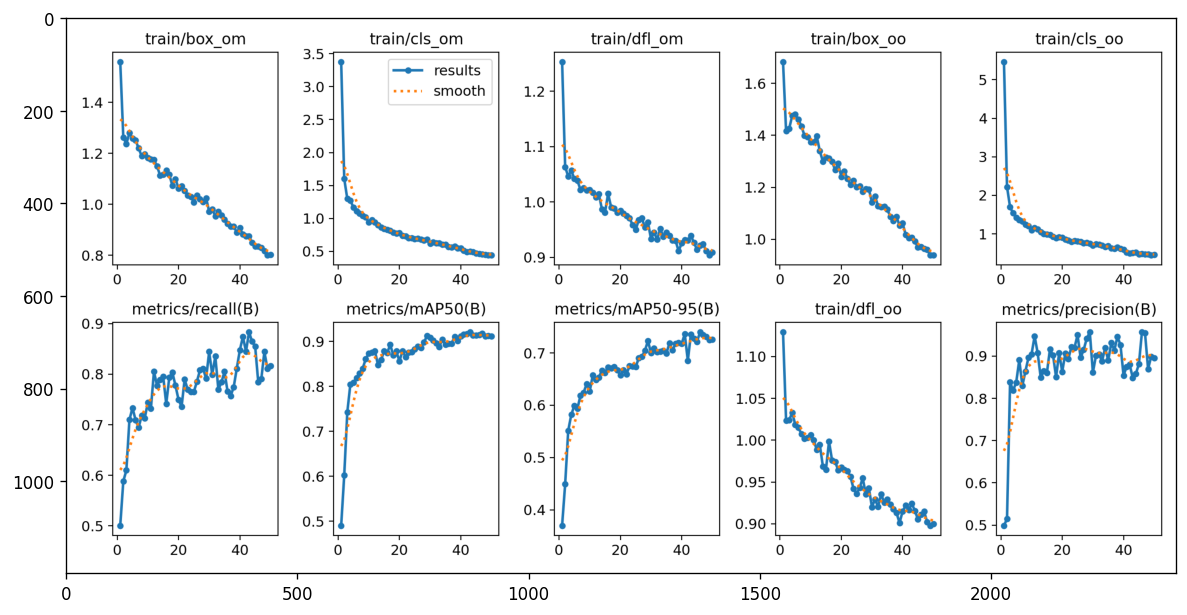

In [ ]:
figure, axis = plt.subplots(1, 1, figsize = (10, 10), dpi = 120)
image = cv2.imread('/content/runs/detect/train/results.png')
axis.imshow(image[:, :, ::-1])
figure.tight_layout()
plt.show()

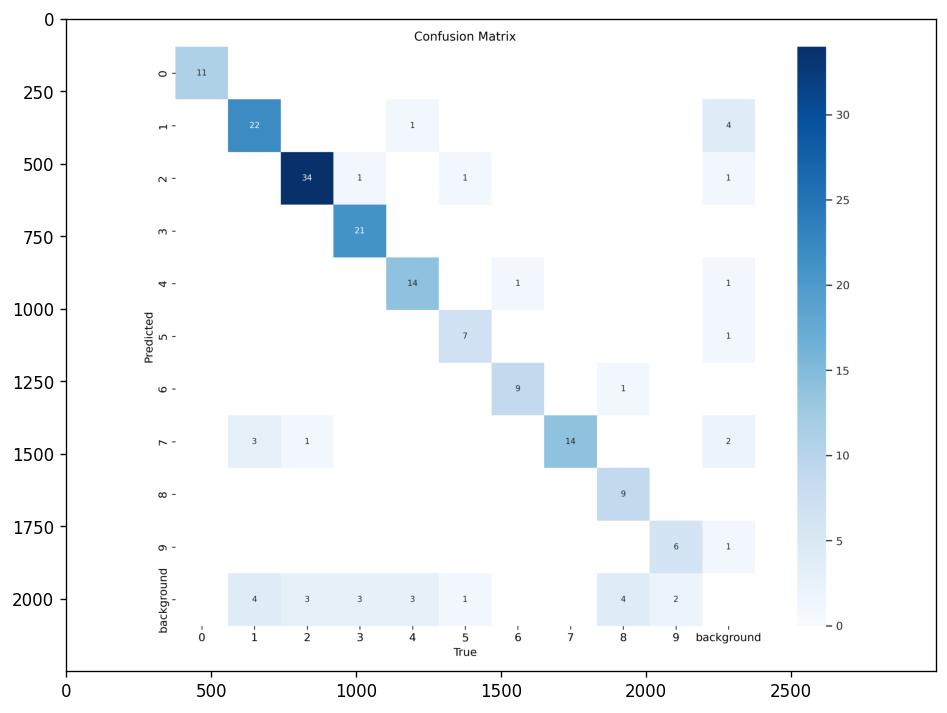

In [ ]:
figure, axis = plt.subplots(1, 1, figsize = (8, 8), dpi = 120)
image = cv2.imread('/content/runs/detect/train/confusion_matrix.png')
axis.imshow(image[:, :, ::-1])
figure.tight_layout()
plt.show()

# Visualize in test data.

In [ ]:
model = YOLOv10('/content/runs/detect/train/weights/best.pt')

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")


In [ ]:
res = model.predict('/content/digit_in_the_back/test/images', conf = 0.5)


image 1/30 /content/digit_in_the_back/test/images/1dc34fde-3500_2.jpg: 448x640 1 2, 1 7, 65.0ms
image 2/30 /content/digit_in_the_back/test/images/1e028d1d-3862.jpg: 448x640 1 2, 1 6, 26.1ms
image 3/30 /content/digit_in_the_back/test/images/3554c696-3500_1.jpg: 384x640 1 1, 1 2, 1 3, 1 8, 1 9, 51.9ms
image 4/30 /content/digit_in_the_back/test/images/3a58a07e-4229.jpg: 384x640 3 1s, 2 2s, 23.7ms
image 5/30 /content/digit_in_the_back/test/images/42f7d551-3240.jpg: 384x640 1 1, 2 2s, 1 3, 2 6s, 2 9s, 23.7ms
image 6/30 /content/digit_in_the_back/test/images/4a01c7c3-3591.jpg: 448x640 1 4, 26.9ms
image 7/30 /content/digit_in_the_back/test/images/524ce822-4309.jpg: 416x640 1 0, 1 1, 1 2, 1 8, 45.0ms
image 8/30 /content/digit_in_the_back/test/images/5928071b-3690.jpg: 544x640 1 1, 2 2s, 1 7, 1 8, 49.7ms
image 9/30 /content/digit_in_the_back/test/images/631f2bfd-3782.jpg: 384x640 3 1s, 1 2, 2 4s, 1 8, 1 9, 23.8ms
image 10/30 /content/digit_in_the_back/test/images/64f97c98-3464.jpg: 384x640 2 1

In [ ]:
indices = random.sample(range(30), 10)
figure, axes = plt.subplots(5,2, figsize = (12,20))
for k in range(5):
  for i in range(2):
    axes[k][i].imshow(res[indices[2*k+i]].plot()[:,:,::-1])
figure.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.